In [ ]:
import pandas as pd
from privacypacking.utils.utils import LOGS_PATH
from privacypacking.utils.analysis import load_ray_experiment
import plotly.express as px

In [ ]:
logs = LOGS_PATH.joinpath("ray/run_and_report_2021-08-18_12-01-17")
df = load_ray_experiment(logs)

In [ ]:
df["n_blocks"] = df.apply(lambda row: row["config"]["blocks_spec"]["initial_num"], axis=1) 

In [ ]:
for curve in ["gaussian", "laplace", "SubsampledGaussian"]:
    df[f"n_{curve}"] = df.apply(lambda row: row["config"]["tasks_spec"]["curve_distributions"][curve]["initial_num"], axis=1) 

In [ ]:
df

In [ ]:
px.line(df.query("n_laplace == 50 and n_gaussian == 50 and n_SubsampledGaussian == 50").sort_values(["n_blocks", "scheduler"]), x="n_blocks", y="n_allocated_tasks", color="scheduler")

In [ ]:
px.line(df.query("n_laplace == 85 and n_gaussian == 85 and n_SubsampledGaussian == 85").sort_values(["n_blocks", "scheduler"]), x="n_blocks", y="n_allocated_tasks", color="scheduler")

In [ ]:
px.line(df.query("n_laplace == 100 and n_gaussian == 100 and n_SubsampledGaussian == 100").sort_values(["n_blocks", "scheduler"]), x="n_blocks", y="n_allocated_tasks", color="scheduler")

In [ ]:
px.line(df.query("n_laplace == n_gaussian and n_laplace == n_SubsampledGaussian and n_blocks == 10").sort_values(["n_tasks", "scheduler"]), x="n_tasks", y="n_allocated_tasks", color="scheduler",
        title="Number of allocated tasks for different offline schedulers, depending on the total number of tasks"
       
       )

## Setup
- Offline: all the tasks and blocks are known in advance
- 10 blocks 
- 1/3 of the tasks are Laplace, 1/3 Gaussian, 1/3 Subsampled Gaussian
- Each task has a different noise (e.g. sigma sampled between 1 and 5)
- Each task has profit = 1 (to be fair to DPF which doesn't handle profit)

## Schedulers

- Simplex solves the ILP to find the optimal allocation
- OfflineDPF orders the tasks by dominant share and schedules them in order
- FlatRelevance and OverflowRelevance use coefficients to weight the RDP orders. See the heuristics notes:

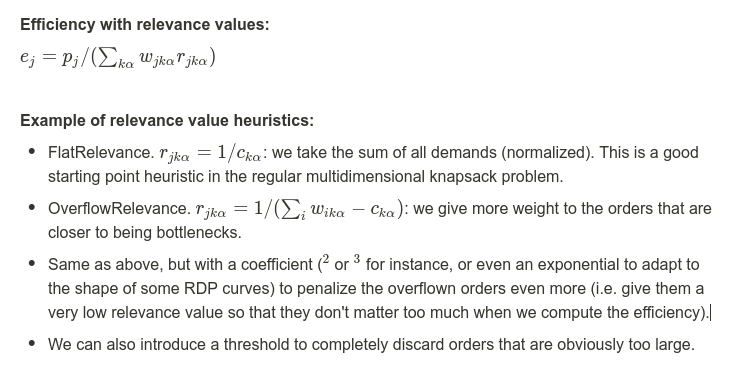


